# __이미지 분류 모델 만들기__

- 튜토리얼 난이도: ★☆☆☆☆
- 읽는데 걸리는 시간: 10분
- 사용 언어: [SQL](https://ko.wikipedia.org/wiki/SQL) (100%)
- 실행 파일 위치: tutorial/thanosql_ml/classification/image_classification.ipynb
- 참고 문서: [(AI-Hub) 상품이미지 데이터](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=64), [A ConvNet for the 2020s](https://arxiv.org/abs/2201.03545)

## 튜토리얼 소개

<div class="admonition note">
   <h4 class="admonition-title">분류 작업 이해하기</h4>
   <p>분류 작업은 목푯값(Target)이 속한 범주(Category 또는 Class)를 예측하기 위해 사용하는 <a href="https://ko.wikipedia.org/wiki/%EA%B8%B0%EA%B3%84_%ED%95%99%EC%8A%B5">머신러닝(기계학습/Machine Learning)</a>의 한 형태입니다. 예를 들어, 남성 또는 여성을 분류하는 이진 분류와 동물의 종(개, 고양이, 토끼 등)을 예측하는 다중 분류 모두 분류 작업에 포함됩니다.</p>
</div>

2010년부터 인공지능 모델을 사용해서 이미지를 분류하는 대회([ImageNet](https://en.wikipedia.org/wiki/ImageNet))가 열려 왔습니다. 대회 초기 우승한 모델의 분류 성능은 약 72%였으나 2015년 우승한 [ResNet](https://arxiv.org/abs/1512.03385) 모델은 약 96%의 성능을 기록하며 특정 영역에서는 인간의 분류 능력을 뛰어넘기 시작했습니다.

<div class="admonition tip">
   <p>같은 데이터의 인간의 분류 능력은 약 95%라고 합니다.</p>
</div>

정확한 이미지 분류를 위해서는 대량의 데이터 세트에 대한 [데이터 라벨링](https://en.wikipedia.org/wiki/Labeled_data) 작업이 필요하지만, 사전 학습된 인공지능 모델의 가중치를 사용하여 소량의 라벨링 된 데이터 세트에 맞게 재보정해서 사용하는 방법들이 널리 적용되고 있습니다. 결과적으로 비교적 적은 수의 데이터를 가지고도, 딥러닝 모델의 훈련을 가능하게 합니다.

ThanoSQL에서는 다양한 사전 학습된 인공지능 모델을 제공하고 있으며, 간단한 쿼리 구문을 통해 모델을 만들 수 있게 제공합니다. 이를 통해, 사용자는 적절하게 학습된 이미지 분류 모델로부터 특징을 정량화하기 힘든 이미지로부터 잠재적인 인사이트를 추출하고 다양한 서비스에 활용할 수 있습니다.

__아래는 ThanoSQL 이미지 분류 모델의 활용 및 예시입니다.__

- ThanoSQL 이미지 분류 모델은 온라인 상품 판매 서비스에서 상품 등록을 위한 적절한 범주를 찾는 과정의 반복을 줄여줍니다. 간단한 쿼리 구문만으로 제품 사진의 범주를 분류할 수 있습니다. 사용자는 일부 잘못 분류 된 데이터를 수정하는 작업만을 진행함으로써 기존 이미지 분류에 사용하던 시간을 절약할 수 있습니다.
- 미술 작품의 대여 또는 판매 서비스를 하는 경우 각 작품의 느낌, 기법, 어울리는 장소 등 기준이 모호하여 분류하기 어려운 작업들을 이미지 분류 모델을 사용해 대략적으로 분류할 수 있습니다.
- 제조 공장에서 육안으로 확인하던 스크래치나 파손과 같은 불량품을 감지하고 분류할 수 있습니다. 레이저 스펙트럼과 같은 신호 정보도 시각화 변환과 같은 처리를 통해서 이미지 분류 모델에 적용할 수 있습니다.

<div class="admonition tip">
   <p>미술 작품을 좋아하는 사람들의 행동 이력(구매 또는 대여 이력, 선호도 등)을 데이터 베이스에 저장하고 활용해서 특정 작품을 좋아할 것으로 예상되는 그룹을 찾는 분류 모델을 만들 수도 있습니다. 즉, 미술 작품의 이미지만을 이용해서 연령대(20대, 30대, 40대 등), 성별(남, 여), 전시 장소(집, 카페, 회사 등) 등에서의 선호도를 예측하는 모델을 만들 수 있습니다.</p>
</div>

<div class="admonition note">
   <h4 class="admonition-title">본 튜토리얼에서는</h4>
   <p>👉 대표적인 AI 오픈데이터 공유 플랫폼인 <a href="https://aihub.or.kr/">AI-Hub</a>의 상품 이미지 데이터 세트를 사용하여 10,000종 이상의 상품을 분류하는 모델을 구축합니다. 구축된 모델은 스마트물류창고, 무인 스토어등에서 탐지, 식별 솔루션으로 활용이 가능합니다. 데이터 세트는 일반적으로 이미지 분류 기술의 학습에 활용하는 이미지 및 라벨(정답)쌍의 약 10,000 종 이상의 상품 데이터 세트로 구성되어 있고 총 1,440,000 장의 이미지가 포함되어 있습니다. 본 튜토리얼에서는 ThanoSQL의 사용방법을 익히고 빠른 결과 확인을 위해, 훈련용 데이터 1,800장과 테스트 데이터 200장만을 사용합니다.</p>
</div>

[![상품 이미지 예시](https://docs.thanosql.ai/1.5/img/thanosql_ml/classification/image_classification/image_classification_data_intro.png "상품 이미지 예시")](https://docs.thanosql.ai/1.5/img/thanosql_ml/classification/image_classification/image_classification_data_intro.png)

<div class="admonition warning">
   <h4 class="admonition-title">튜토리얼 주의 사항</h4>
   <ul>
      <li>이미지 분류 모델은 하나의 이미지에서 하나의 목푯값(Target, 범주/레이블/라벨)를 예측하는 용도로 사용할 수 있습니다.</li>
      <li>이미지의 경로를 나타내는 컬럼(Column)과, 이미지의 목푯값을 나타내는 컬럼이 존재해야 합니다.</li>
      <li>해당 이미지 분류 모델의 베이스 모델(<strong>CONVNEXT</strong>)은 GPU를 사용합니다. 사용한 모델의 크기와 배치 사이즈에 따라 GPU 메모리가 부족할 수 있습니다. 이 경우, 더 작은 모델을 사용하시거나 배치 사이즈를 줄여보십시오.</li>
   </ul>
</div>

## __0. 데이터 세트 준비__

ThanoSQL의 쿼리 구문을 사용하기 위해서는 [ThanoSQL 워크스페이스](https://docs.thanosql.ai/1.5/ko/getting_started/paas/workspace/lab/)에서 언급된 것처럼 API 토큰을 생성하고 아래의 쿼리를 실행해야 합니다.

In [ ]:
%load_ext thanosql
%thanosql API_TOKEN=<발급받은_API_TOKEN>

### __데이터 세트 준비__

In [2]:
%%thanosql
GET THANOSQL DATASET product_image_data
OPTIONS (overwrite=True)

Success


<div class="admonition note">
    <h4 class="admonition-title">쿼리 세부 정보</h4>
    <ul>
        <li>"<strong>GET THANOSQL DATASET</strong>" 쿼리 구문을 사용하여 원하는 데이터 세트를 워크스페이스에 저장합니다.</li>
        <li>"<strong>OPTIONS</strong>" 쿼리 구문을 통해 <strong>GET THANOSQL DATASET</strong>에 사용할 옵션을 지정합니다.
        <ul>
            <li>"overwrite": 동일 이름의 데이터 세트가 존재하는 경우 덮어쓰기 가능 여부 설정. True일 경우 기존 데이터 세트는 새로운 데이터 세트로 변경됨 (bool, optional, True|False, default: False)</li>
        </ul>
        </li>
    </ul>
</div>

In [3]:
%%thanosql
COPY product_image_train
OPTIONS (if_exists='replace')
FROM 'thanosql-dataset/product_image_data/product_image_train.csv'

Success


In [4]:
%%thanosql
COPY product_image_test
OPTIONS (if_exists='replace')
FROM 'thanosql-dataset/product_image_data/product_image_test.csv'

Success


<div class="admonition note">
    <h4 class="admonition-title">쿼리 세부 정보</h4>
    <ul>
        <li>"<strong>COPY</strong>" 쿼리 구문을 사용하여 데이터베이스에 저장 할 테이블명을 지정합니다.</li>
        <li>"<strong>OPTIONS</strong>" 쿼리 구문을 통해 <strong>COPY</strong>에 사용할 옵션을 지정합니다.
        <ul>
            <li>"if_exists": 동일 이름의 테이블이 존재하는 경우 처리하는 방법 설정. 오류 발생, 기존 테이블에 추가, 기존 테이블 대체 (str, optional, 'fail'|'replace'|'append', default: 'fail')</li>
        </ul>
        </li>
    </ul>
</div>

## __1. 데이터 세트 확인__

이미지 분류 모델을 만들기 위해 ThanoSQL 워크스페이스 데이터베이스에 저장되어 있는 __product_image_train__ 테이블을 사용합니다. 아래의 쿼리 구문을 실행하고 테이블의 내용을 확인합니다.

In [5]:
%%thanosql
SELECT *
FROM product_image_train
LIMIT 5

image_path div_l     div_m  \
0  thanosql-dataset/product_image_data/product_im...   유제품      요구르트   
1  thanosql-dataset/product_image_data/product_im...   홈클린      위생용품   
2  thanosql-dataset/product_image_data/product_im...    면류       용기면   
3  thanosql-dataset/product_image_data/product_im...   디저트  디저트/베이커리   
4  thanosql-dataset/product_image_data/product_im...    주류      기타주류   

      div_s     div_n   comp_nm         img_prod_nm  multi  
0  떠먹는 요구르트  떠먹는 요구르트        기타          토핑오트&애플시나몬  False  
1      일반비누      일반비누       크리오           크리오)골드디비누   True  
2    국물용기라면      짬뽕라면        농심         농심오징어짬뽕컵67G   True  
3     냉장디저트     냉장디저트  Dole 코리아  Dole후룻볼슬라이스복숭아198g  False  
4       칵테일       칵테일      롯데주류      순하리소다톡바나나355ML   True

<div class="admonition note">
   <h4 class="admonition-title">데이터 테이블 이해하기</h4>
   <p><strong>product_image_train</strong> 테이블은 아래와 같은 정보를 담고 있습니다.</p>
   <ul>
      <li>image_path: 각 이미지의 파일의 위치 정보</li>
      <li>div_l: 상품의 대분류</li>
      <li>div_m: 상품의 중분류</li>
      <li>div_s: 상품의 소분류</li>
      <li>div_n: 상품의 세분류</li>
      <li>comp_nm: 제조사</li>
      <li>img_prod_nm: 상품명 (이미지상)</li>
      <li>multi: 복수 상품 이미지인지 여부</li>
   </ul>
</div>

/home/jovyan/thanosql-dataset/product_image_data/product_image/10246_00_s_21.png


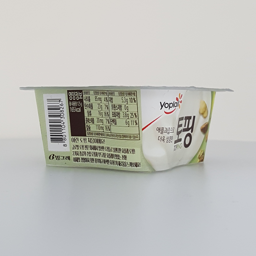

/home/jovyan/thanosql-dataset/product_image_data/product_image/10180_60_m_9.png


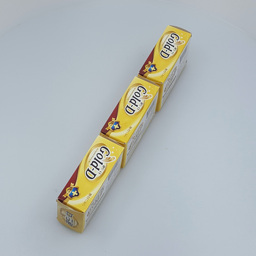

/home/jovyan/thanosql-dataset/product_image_data/product_image/10101_30_m_17.png


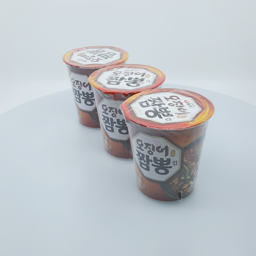

/home/jovyan/thanosql-dataset/product_image_data/product_image/10242_60_s_12.png


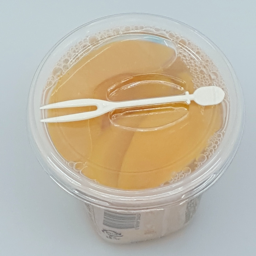

/home/jovyan/thanosql-dataset/product_image_data/product_image/10054_30_m_13.png


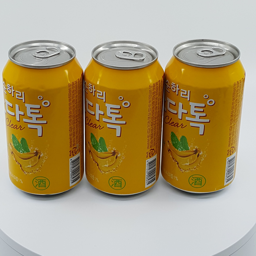

In [6]:
%%thanosql
PRINT IMAGE
AS
SELECT image_path
FROM product_image_train
LIMIT 5

## __2. 이미지 분류 모델 생성__

이전 단계에서 확인한 __product_image_train__ 테이블을 사용하여 이미지 분류 모델을 만듭니다. 아래의 쿼리 구문을 실행하여 <strong>my_product_classifier</strong>이라는 이름의 모델을 만듭니다.  
(쿼리 실행 시 예상 소요 시간: 5 min)

In [7]:
%%thanosql
BUILD MODEL my_product_classifier
USING ConvNeXt_Tiny
OPTIONS (
  image_col='image_path',
  label_col='div_l',
  max_epochs=1,
  overwrite=True
  )
AS
SELECT *
FROM product_image_train

Success


<div class="admonition note">
    <h4 class="admonition-title">쿼리 세부 정보</h4>
    <ul>
        <li>"<strong>BUILD MODEL</strong>" 쿼리 구문을 사용하여 <strong>my_product_classifier</strong>이라는 모델을 만들고 학습시킵니다.</li>
        <li>"<strong>USING</strong>" 쿼리 구문을 통해 베이스 모델로 <strong>ConvNeXt_Tiny</strong>를 사용할 것을 명시합니다.</li>
        <li>"<strong>OPTIONS</strong>" 쿼리 구문을 통해 모델 생성에 사용할 옵션을 지정합니다.
        <ul>
            <li>"image_col": 이미지 경로를 담은 컬럼의 이름 (str, default: 'image_path')</li>
            <li>"label_col": 목푯값의 정보를 담은 컬럼의 이름 (str, default: 'label')</li>
            <li>"max_epochs": 모든 학습 데이터 세트를 학습하는 횟수 (int, optional, default: 3)</li>
            <li>"overwrite": 동일 이름의 모델이 존재하는 경우 덮어쓰기 가능 여부 설정. True일 경우 기존 모델은 새로운 모델로 변경됨 (bool, optional, True|False, default: False)</li>
        </ul>
        </li>
    </ul>
</div>

<div class="admonition tip">
    <p>여기서는 빠르게 학습하기 위해 "max_epochs"를 1로 지정했습니다. 일반적으로 숫자가 클수록 많은 계산 시간이 소요되지만 학습이 진행됨에 따라 예측 성능이 올라갑니다.</p>
</div>

## __3. 생성된 모델을 사용하여 상품 이미지 분류 결과 예측__

이전 단계에서 생성한 상품 이미지 분류 모델을 사용해 특정 이미지를 예측해 봅니다. 테스트용 데이터 세트(학습에 이용되지 않은 데이터 테이블, <strong>product_image_test</strong>)를 사용합니다.

In [8]:
%%thanosql
PREDICT USING my_product_classifier
OPTIONS (
    image_col='image_path',
    result_col='predict_result'
    )
AS
SELECT *
FROM product_image_test

image_path div_l     div_m  \
0    thanosql-dataset/product_image_data/product_im...  생활용품      위생용품   
1    thanosql-dataset/product_image_data/product_im...    소스        장류   
2    thanosql-dataset/product_image_data/product_im...   디저트  디저트/베이커리   
3    thanosql-dataset/product_image_data/product_im...    음료     기능성음료   
4    thanosql-dataset/product_image_data/product_im...    주류      기타주류   
..                                                 ...   ...       ...   
197  thanosql-dataset/product_image_data/product_im...  의약외품     기능성음료   
198  thanosql-dataset/product_image_data/product_im...    소스        장류   
199  thanosql-dataset/product_image_data/product_im...    주류      기타주류   
200  thanosql-dataset/product_image_data/product_im...   유제품      요구르트   
201  thanosql-dataset/product_image_data/product_im...    주류      기타주류   

        div_s     div_n   comp_nm         img_prod_nm  multi predict_result  
0          면봉        면봉        기타       콩맥스전자담배용크리닝면봉   True           생활용품  
1          쌈장        쌈장   씨제이제일제당       해찬들고기전용쌈장450G  False             소스  
2       냉장디저트     냉장디저트  Dole 코리아  Dole후룻볼슬라이스복숭아198g  False            디저트  
3        한방음료      한방음료      광동제약       유어스광동어성초500ml  False             음료  
4         칵테일       칵테일      롯데주류      순하리소다톡바나나355ML  False             주류  
..        ...       ...       ...                 ...    ...            ...  
197    숙취해소음료    숙취해소음료      동아제약     동아제약)가그린제로100ML  False           의약외품  
198        쌈장        쌈장   씨제이제일제당       해찬들고기전용쌈장450G   True             소스  
199       칵테일       칵테일      롯데주류      순하리소다톡바나나355ML   True             주류  
200  떠먹는 요구르트  떠먹는 요구르트        기타          토핑오트&애플시나몬  False            유제품  
201       칵테일       칵테일      롯데주류      순하리소다톡바나나355ML   True             주류  

[202 rows x 9 columns]

<div class="admonition note">
    <h4 class="admonition-title">쿼리 세부 정보</h4>
    <ul>
        <li>"<strong>PREDICT USING</strong>" 쿼리 구문을 사용하여 이전 단계에서 만든 <strong>my_product_classifier</strong> 모델을 예측에 사용합니다.</li>
        <li>"<strong>OPTIONS</strong>" 쿼리 구문을 통해 예측에 사용할 옵션을 지정합니다.
        <ul>
            <li>"image_col": 예측에 사용할 이미지의 경로가 기록되어 있는 컬럼의 이름 (str, default: 'image_path')</li>
            <li>"result_col": 데이터 테이블에서 예측 결과를 담을 컬럼 이름 (str, optional, default: 'predict_result')</li>
        </ul>
        </li>
    </ul>
</div>

## __4. 튜토리얼을 마치며__

이번 튜토리얼에서는 상품 이미지 데이터 세트를 사용하여 이미지 분류 모델을 만들어 보았습니다. 초급 단계 튜토리얼인만큼 정확도 향상을 위한 과정 설명보다는 작동 위주의 설명으로 진행했습니다. 이미지 분류 모델은 각 플랫폼이나 서비스에 맞는 정밀한 튜닝을 통해 정확도를 향상 시킬 수 있고 적은 양의 데이터 라벨링만으로도 대부분 만족스러운 결과를 얻을 수 있습니다. 나만의 데이터를 이용해서 베이스 모델을 학습하거나, 자가학습(Self-supervised) 모델 등을 이용해 나의 데이터를 수치화하여 변환한 후 자동화 된 머신러닝(AutoML) 기법을 이용한 배포도 가능합니다. 다양한 비정형 데이터(오디오, 비디오, 텍스트 등)와 수치형 데이터들을 결합하여 나만의 모델을 만들고 경쟁력있는 서비스를 제공해 보세요.

* [나만의 데이터 업로드하기](https://docs.thanosql.ai/1.5/ko/getting_started/data_upload/)
* [나만의 데이터 테이블 생성하기](https://docs.thanosql.ai/1.5/ko/how-to_guides/ThanoSQL_query/COPY_SYNTAX/)
* [나만의 모델 업로드하기](https://docs.thanosql.ai/1.5/ko/how-to_guides/ThanoSQL_query/UPLOAD_MODEL_SYNTAX/)

<div class="admonition tip">
    <h4 class="admonition-title">나만의 서비스를 위한 모델 배포 관련 문의</h4>
    <p>ThanoSQL을 활용해 나만의 모델을 만들거나, 나의 서비스에 적용하는데 어려움이 있다면 언제든 아래로 문의주세요😊</p>
    <p>이미지 분류 모델 구축 관련 문의: <a href="mailto:contact@smartmind.team">contact@smartmind.team</a></p>
</div>